In [158]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras.models import load_model


import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [117]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load  dataset
dataset = pd.read_csv('/home/francovm/Projects/SSE/data/processed/input_data.csv', sep='\t', encoding='utf-8' )

# split into input (X) and output (Y) variables

train_X = dataset.drop(columns=['Events'])


#Non categorical data
train_Y = dataset['Events'].values


#get number of columns in training data
n_cols = train_X.shape[1]


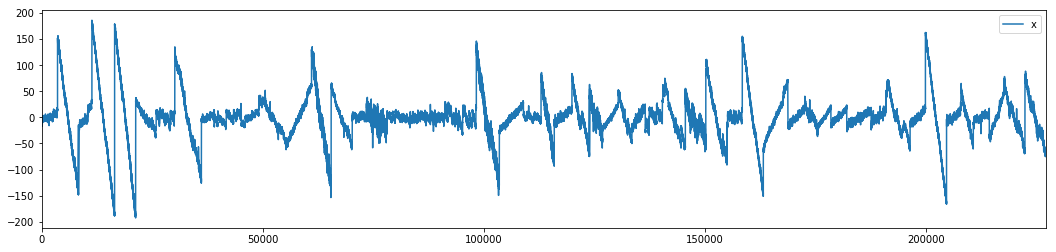

In [166]:
# dataset.plot(y='Events')
dataset.head()
dataset.plot(y='x')

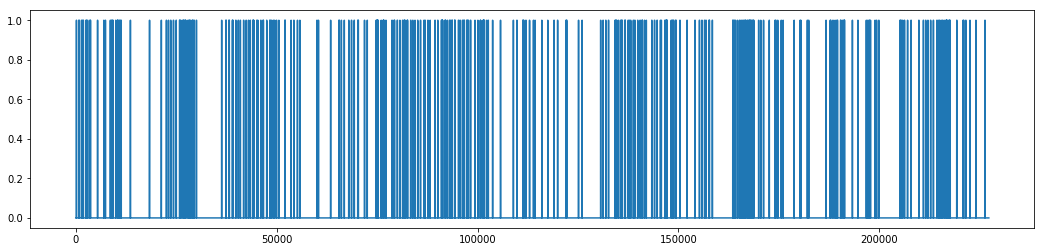

In [151]:
plt.plot(train_Y)

In [152]:


# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed)

# X_train = train_X
# y_train = train_Y

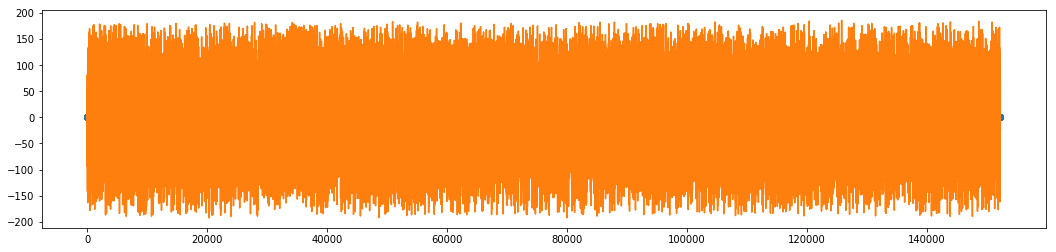

In [165]:
plt.plot(y_train,'o')
plt.plot(X_train['x'].values)


In [142]:
X_train.head()

,x,error,n,n_error,u,u_error
0,-12.13,1.75,-91.30,1.87,-8.79,6.55
1,-12.46,1.77,-91.54,1.90,-10.85,6.64
2,-12.98,1.70,-91.25,1.83,-7.59,6.46
3,-13.06,1.75,-91.21,1.87,-11.09,6.55
4,-12.76,1.81,-92.19,1.94,-9.78,6.81


In [143]:
#standardizing the input feature
sc = StandardScaler()
X = sc.fit_transform(X_train)
X.shape

(227233, 6)

In [144]:
y_train.shape


(227233,)

In [145]:
model_2 = Sequential()


#add layers to model
model_2.add(Dense(12, activation='relu', input_shape=(n_cols,)))
# model_2.add(Dropout(0.5))
model_2.add(Dense(12, activation='relu'))
# model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

# Compile model

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)

# Fit the model


history = model_2.fit(X,y_train, 
                      epochs=100, 
                      validation_split=0.33,
                      batch_size=64,
                      callbacks=[early_stopping_monitor])



Train on 152246 samples, validate on 74987 samples
Epoch 1/100
152246/152246 [==============================] - 7s 44us/step - loss: 0.1975 - acc: 0.9527 - val_loss: 0.1558 - val_acc: 0.9643
Epoch 2/100
152246/152246 [==============================] - 6s 36us/step - loss: 0.1852 - acc: 0.9530 - val_loss: 0.1560 - val_acc: 0.9643
Epoch 3/100
152246/152246 [==============================] - 5s 36us/step - loss: 0.1845 - acc: 0.9530 - val_loss: 0.1537 - val_acc: 0.9643
Epoch 4/100
152246/152246 [==============================] - 5s 35us/step - loss: 0.1841 - acc: 0.9530 - val_loss: 0.1539 - val_acc: 0.9643
Epoch 5/100
152246/152246 [==============================] - 6s 37us/step - loss: 0.1838 - acc: 0.9530 - val_loss: 0.1560 - val_acc: 0.9643
Epoch 6/100
152246/152246 [==============================] - 6s 36us/step - loss: 0.1835 - acc: 0.9530 - val_loss: 0.1560 - val_acc: 0.9643
Epoch 7/100
152246/152246 [==============================] - 6s 36us/step - loss: 0.1832 - acc: 0.9530 - val_

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


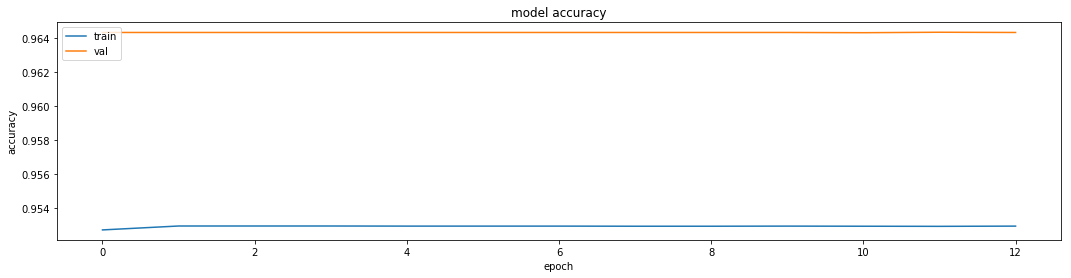

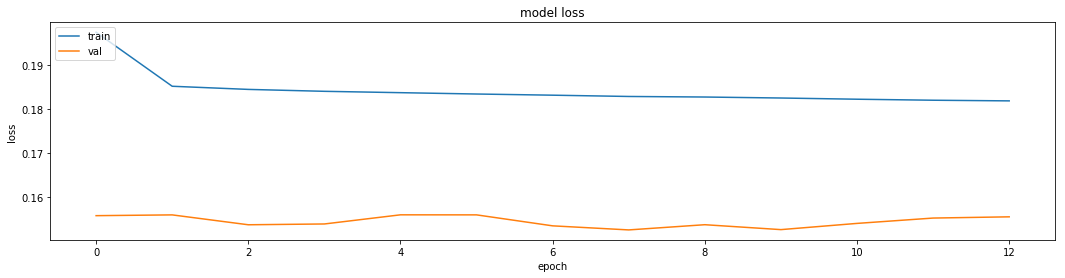

In [148]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
#  Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
 # Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [147]:
# evaluate the model
scores = model_2.evaluate(X_test,y_test)
print((scores[1]*100))

74987/74987 [==============================] - 1s 19us/step
94.78576286556336


In [126]:
y_test


array([0., 0., 0., ..., 0., 0., 0.])

In [133]:
#standardizing the input feature
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

ynew = model_2.predict_classes(X_test)

# ynew = np.argmax(ynew[:])

In [135]:
ynew

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

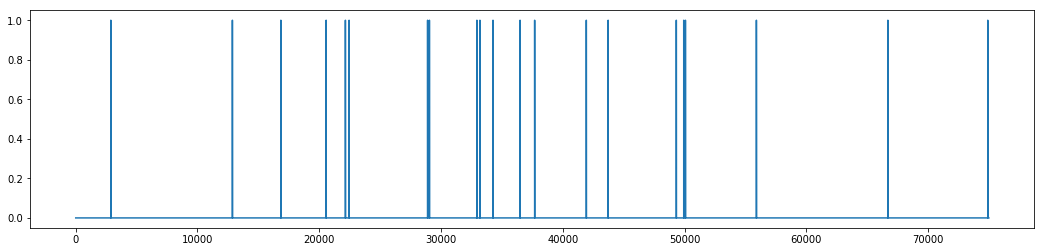

In [167]:
plt.plot(ynew) # plotting by columns
# plt.plot(y_test)
# plt.axhline(0.5)
plt.show()

# Save the Model (Keras)

In [149]:
# save model and architecture to single file
# model_2.save('/home/francovm/Projects/SSE/models/NN/NN_SSE_95.h5')

In [ ]:
# # load model
# model = load_model('NN_SSE_95.h5')
# # summarize model.
# model.summary()



In [ ]:
# # load dataset
# dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # evaluate the model
# score = model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))